In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Creating the dataset

In [203]:
rollno = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
name = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", np.nan, np.nan, "k", "l", "m"]
marks = [40, 23, 50, 78, 48, 89, 90, 67, 84, 96, 76, np.nan, 97, np.nan, 65]
grade = ["F", "F", "P", "P", "P", "P", "P", "P", "P", "P", "P", "F", "P", np.nan, np.nan]

In [204]:
df = pd.DataFrame({"rollno" : rollno, "name" : name, "marks" : marks, "grade" : grade})

In [205]:
df

,rollno,name,marks,grade
0,1,a,40.0,F
1,2,b,23.0,F
2,3,c,50.0,P
3,4,d,78.0,P
4,5,e,48.0,P
5,6,f,89.0,P
6,7,g,90.0,P
7,8,h,67.0,P
8,9,i,84.0,P
9,10,j,96.0,P


# Dataset Statistics

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rollno  15 non-null     int64  
 1   name    13 non-null     object 
 2   marks   13 non-null     float64
 3   grade   13 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 608.0+ bytes


In [207]:
df.describe()

,rollno,marks
count,15.000000,13.000000
mean,8.000000,69.461538
std,4.472136,23.247277
min,1.000000,23.000000
25%,4.500000,50.000000
50%,8.000000,76.000000
75%,11.500000,89.000000
max,15.000000,97.000000


In [208]:
df.dtypes

rollno      int64
name       object
marks     float64
grade      object
dtype: object

In [209]:
df.columns

Index(['rollno', 'name', 'marks', 'grade'], dtype='object')

In [210]:
df.isna().sum()

rollno    0
name      2
marks     2
grade     2
dtype: int64

In [211]:
df.to_csv("academic_performance.csv")

# Null values

In [212]:
df.isna().sum()

rollno    0
name      2
marks     2
grade     2
dtype: int64

In [213]:
df["marks"] = df["marks"].fillna(df["marks"].mean())

In [214]:
df

,rollno,name,marks,grade
0,1,a,40.000000,F
1,2,b,23.000000,F
2,3,c,50.000000,P
3,4,d,78.000000,P
4,5,e,48.000000,P
5,6,f,89.000000,P
6,7,g,90.000000,P
7,8,h,67.000000,P
8,9,i,84.000000,P
9,10,j,96.000000,P


In [215]:
def fun1(value):
    return int(math.floor(value))

In [216]:
df["marks"] = df["marks"].apply(fun1)

In [217]:
df

,rollno,name,marks,grade
0,1,a,40,F
1,2,b,23,F
2,3,c,50,P
3,4,d,78,P
4,5,e,48,P
5,6,f,89,P
6,7,g,90,P
7,8,h,67,P
8,9,i,84,P
9,10,j,96,P


In [218]:
df = df[df['name'].notna()]

In [219]:
df

,rollno,name,marks,grade
0,1,a,40,F
1,2,b,23,F
2,3,c,50,P
3,4,d,78,P
4,5,e,48,P
5,6,f,89,P
6,7,g,90,P
7,8,h,67,P
8,9,i,84,P
9,10,j,96,P


In [220]:
for index, row in df.iterrows():
    # print(row['marks'], row['grade'])
    if (row['marks'] > 40):
        df.loc[index, 'grade'] = 'P'
    else:
        df.loc[index, 'grade'] = 'F'

In [221]:
df

,rollno,name,marks,grade
0,1,a,40,F
1,2,b,23,F
2,3,c,50,P
3,4,d,78,P
4,5,e,48,P
5,6,f,89,P
6,7,g,90,P
7,8,h,67,P
8,9,i,84,P
9,10,j,96,P


# Outliers

In [222]:
first_outlier = [16, 'n', 200, 'P']
second_outlier = [17, 'o', -100, 'F']

In [223]:
df.loc[15] = first_outlier
df.loc[16] = second_outlier

In [224]:
df

,rollno,name,marks,grade
0,1,a,40,F
1,2,b,23,F
2,3,c,50,P
3,4,d,78,P
4,5,e,48,P
5,6,f,89,P
6,7,g,90,P
7,8,h,67,P
8,9,i,84,P
9,10,j,96,P


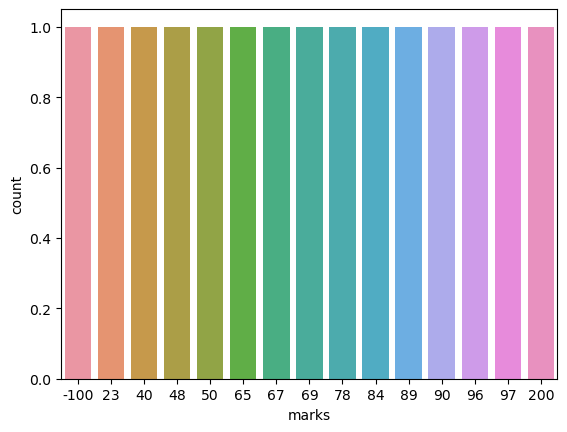

In [225]:
sns.countplot(data=df, x=df['marks']);

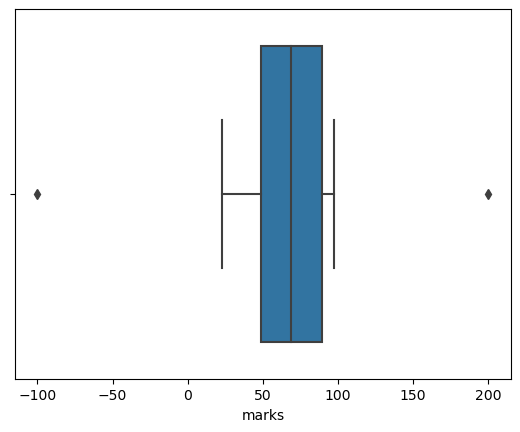

In [226]:
sns.boxplot(data=df, x='marks');

In [227]:
from matplotlib.cbook import boxplot_stats  
outliers = boxplot_stats(df['marks']).pop(0)['fliers']
outliers

array([-100,  200], dtype=int64)

In [228]:
df

,rollno,name,marks,grade
0,1,a,40,F
1,2,b,23,F
2,3,c,50,P
3,4,d,78,P
4,5,e,48,P
5,6,f,89,P
6,7,g,90,P
7,8,h,67,P
8,9,i,84,P
9,10,j,96,P


In [229]:
df = df.drop([15,16], axis=0)

In [230]:
df

,rollno,name,marks,grade
0,1,a,40,F
1,2,b,23,F
2,3,c,50,P
3,4,d,78,P
4,5,e,48,P
5,6,f,89,P
6,7,g,90,P
7,8,h,67,P
8,9,i,84,P
9,10,j,96,P


# Scaling the marks column

In [231]:
from sklearn.preprocessing import MinMaxScaler

In [232]:
scaler = MinMaxScaler()

In [234]:
df[['marks']] = scaler.fit_transform(df[['marks']])

In [235]:
df

,rollno,name,marks,grade
0,1,a,0.229730,F
1,2,b,0.000000,F
2,3,c,0.364865,P
3,4,d,0.743243,P
4,5,e,0.337838,P
5,6,f,0.891892,P
6,7,g,0.905405,P
7,8,h,0.594595,P
8,9,i,0.824324,P
9,10,j,0.986486,P
